In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [55]:
pd.set_option('display.max_columns',200)

```{admonition} Q1
*데이터를 ufc 변수에 로드하라*
```

In [56]:
ufc =pd.read_csv('https://raw.githubusercontent.com/Datamanim/ufc/main/ufc.csv')

In [57]:
ufc.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_wins,B_losses,B_draw,R_wins,R_losses,R_draw,B_Stance,R_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,1,1,0,1,0,0,Orthodox,Orthodox,165.10,170.18,135.0,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,2,0,0,4,2,0,Orthodox,Orthodox,187.96,193.04,205.0,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,03/20_2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,0,4,3,0,Orthodox,Southpaw,187.96,190.50,241.0,187.96,190.50,264.0,32.0,28.0


```{admonition} Q2
**성별에 관한 컬럼 Gender를 추가한다. 남성의경우 male, 여성의경우 Female로 표기 (Red, Blue 선수 상관없이 해당선수들의 성별을 하나의 컬럼에 입력)**
```

In [58]:
ufc['Gender'] = ufc.weight_class.map(lambda x: 'Female' if 'Women' in x else 'male')

ufc['Gender'].head(3)

0    male
1    male
2    male
Name: Gender, dtype: object

```{admonition} Q3
*Gender 컬럼의 value 발생 빈도확인*
```

In [59]:
ufc['Gender'].value_counts()

male      4500
Female     418
Name: Gender, dtype: int64

```{admonition} Q4
*'year' 컬럼에 해당 경기 발생 년도를 입력하라. 년도별 남성,여성각각의 경기숫자를 시각화 하여라*
```

In [60]:
ufc['date'] = pd.to_datetime(ufc['date'].str[-4:] +"-"+ufc['date'].str[:2]+"-"+ufc['date'].str[3:5])
ufc['year'] = ufc['date'].dt.year
gender_count = ufc.groupby(['year','Gender']).count()['date'].reset_index()

In [61]:
gender_count.head(3)

,year,Gender,date
0,1997,male,1
1,1998,male,1
2,1999,male,1


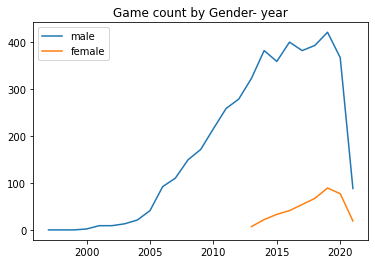

In [10]:
male_df = gender_count[gender_count.Gender=='male']
female_df = gender_count[gender_count.Gender=='Female']


plt.plot(male_df.year,male_df.date,label='male')
plt.plot(female_df.year,female_df.date,label='female')
plt.title('Game count by Gender- year')
plt.legend()
plt.show()

```{admonition} tip
:class: attention
**모듈 내부함수 찾는방법은 dir함수를 이용한다. 주피터노트북상에서 shift + tab 버튼을 모르는 함수위에서 누르면 documentation 기능이 활성화**
```

In [11]:
dir(ufc.date.dt)[-10:]

['timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

```{admonition} Q5
*몇년도 몇월에 가장 많은 경기가 있었는지 확인하라. 매 달 발생한 경기수를 시각화 하여라*
```

In [12]:
month_df = ufc.date.dt.strftime('%Y-%m').value_counts().sort_index()
month_df[month_df ==month_df.max()]

2016-07    61
Name: date, dtype: int64

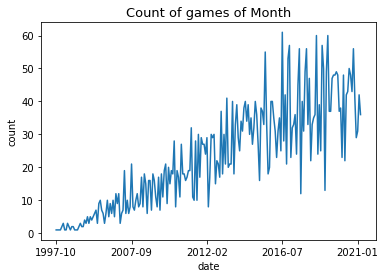

In [13]:
plt.plot(month_df)
plt.xticks([x for x in range(0,len(month_df),int(len(month_df)/4))])
plt.title("Count of games of Month",fontsize=13)
plt.xlabel('date')
plt.ylabel("count")
plt.show()

```{admonition} Q6
*타이틀매치(column : title_bout=True)에 가장 많은 경기를 심판(column : Referee)본 인물과 그 횟수는?*
```

In [14]:
ufc[ufc.title_bout==True].Referee.value_counts().head(1)

Herb Dean    91
Name: Referee, dtype: int64

```{admonition} Q7
*년도에 따른 체급별 타이틀 매치에 관한 데이터를 아래와 같이 새롭게 구성하고 히트맵으로 표시하라(축 label 및 title 설정까지)*
```

In [15]:
pv_table = ufc[ufc.title_bout ==True][['weight_class','year']].\
                                        value_counts().reset_index().\
                                        pivot(index='weight_class',columns='year',values=0).\
                                        fillna(0).astype(int)

In [16]:
pv_table

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
weight_class,,,,,,,,,,,,,,,,,,,,,,
Bantamweight,0,0,0,0,0,0,0,0,0,0,0,3,1,2,4,1,3,1,1,1,2,1
Featherweight,0,0,0,0,0,0,0,0,0,0,0,3,2,2,2,2,2,2,1,2,1,0
Flyweight,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,2,2,2,1,1,3,0
Heavyweight,0,0,1,0,1,2,3,2,3,2,3,1,2,2,2,1,2,1,3,1,1,0
LightHeavyweight,1,3,1,2,2,3,3,2,3,2,1,3,2,2,1,3,2,2,2,2,2,1
Lightweight,0,2,1,1,0,0,1,2,3,3,3,2,4,2,1,3,3,1,3,2,2,0
Middleweight,0,0,0,0,0,3,4,2,3,1,3,2,2,3,4,2,2,2,1,2,2,0
Welterweight,0,0,0,2,2,2,3,3,2,3,2,2,4,3,3,1,3,3,2,2,1,1
WomenBantamweight,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,1,1,2,0,0


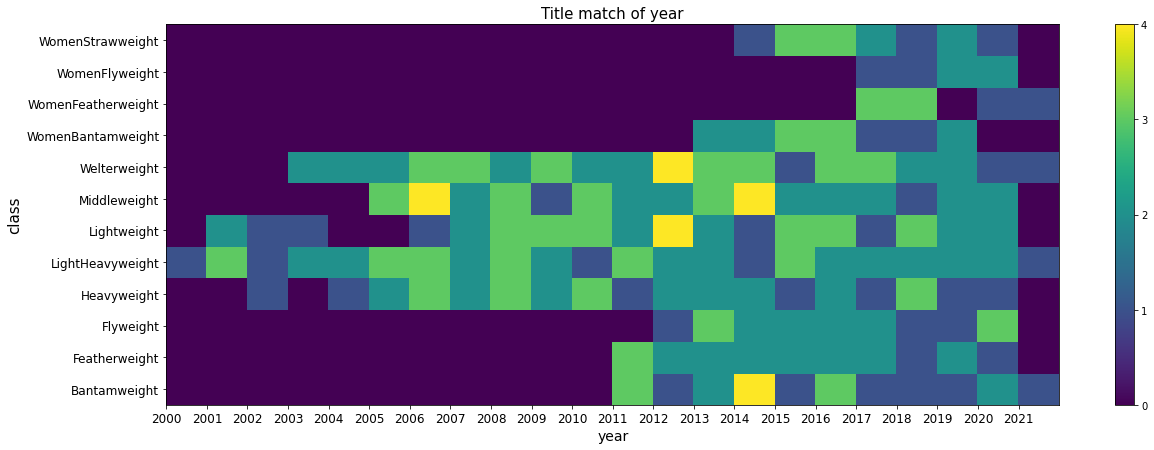

In [17]:
plt.figure(figsize=(20,7))
plt.pcolor(pv_table)
plt.yticks(np.arange(pv_table.shape[0])+0.5,list(pv_table.index),fontsize=12)
plt.xticks(np.arange(pv_table.shape[1]),list(pv_table.columns),fontsize=12)
plt.xlabel('year',fontsize=14)
plt.ylabel('class',fontsize=15)
plt.title('Title match of year',fontsize=15)
plt.colorbar(ticks=[0,1,2,3,4])
plt.show()

```{admonition} Q8
*stance가 다른 선수가 붙었을때 각 stance에 따른 승률을 구하여라. 결과는 아래와 같다. (stance1 : 승률 높은 스탠스 , stance2: 승률 낮은 스탠스, ratio: 승률 높은 스탠스의 승률*
```

In [ ]:
df_ratio = ufc[['B_Stance','R_Stance','Winner']].copy()

df_ratio['Winner_blue'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Blue' else 0).values
df_ratio['Winner_red'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Red' else 0).values
df_ratio['Winner_draw'] = df_ratio.loc[:,'Winner'].map(lambda x: 1 if x=='Draw' else 0).values
df_ratio =df_ratio.drop('Winner',axis=1)

df_ration_diff = df_ratio[['B_Stance','R_Stance']].value_counts().reset_index().rename(columns={0:'counts'})

ratio_target = df_ratio.groupby(['B_Stance','R_Stance']).agg('sum').reset_index()
ratio_target_diff = ratio_target.loc[ratio_target.B_Stance != ratio_target.R_Stance]
ratio_target_diff.head(3)

dic={}
for value in ratio_target_diff.values:
    lst =[value[0],value[1]]
    
    if lst != sorted(lst):
        target = value[1]+"_"+value[0]
        
        if target in dic.keys():
            dic[target][0] += value[3]
            dic[target][1] += value[2]
            dic[target][2] += value[4]
        else:
            dic[target] = [value[3], value[2],value[4]]
            
    else:
        target = value[0]+"_"+value[1]
        if target in dic.keys():
            dic[target][0] += value[2]
            dic[target][1] += value[3]
            dic[target][2] += value[4]
        else:
            dic[target] = [value[2],value[3],value[4] ]
    
sort_dic = {}

for key,value in dic.items():
    if value[0] <= value[1]:
        new_key = key.split('_')[1]+"_"+key.split('_')[0]
        sort_dic[new_key] = [value[1],value[0],value[2]]
        
    else:
        sort_dic[key] =value

ratio_df  = pd.DataFrame(sort_dic).T.rename(columns={0:'win',1:'lose',2:'draw'})

ratio_df['ratio'] =ratio_df['win']/(ratio_df['win']+ratio_df['lose']+ratio_df['draw'])*100

sp = pd.DataFrame(list(ratio_df.reset_index()['index'].str.split('_')))

ratio_fi = pd.concat([sp,ratio_df['ratio'].reset_index(drop=True)],axis=1).rename(columns={0:'stance1',1:'stance2'})\
                .sort_values('ratio',ascending=False)

In [53]:
ratio_fi

,stance1,stance2,ratio
0,Open Stance,Orthodox,63.636364
2,Southpaw,Orthodox,52.050265
4,Switch,Southpaw,50.649351
3,Switch,Orthodox,50.375940
1,Southpaw,Open Stance,50.000000


```{admonition} Q9
*현재 하나의 row에 Red,Blue 2명의 데이터가 존재한다. 하나의 row에 한 선수의 정보가 들어가도록 아래와 같은 새로운 데이터프레임 newUfc를 정의하라.
- 1. R_ ,B_ 가 공통으로 들어가는 컬럼명에서 해당 단어 제외
- 2. R_ ,B_ 가 없는 컬럼들은 동일한 컬럼명으로 추가
- 3. Winner 컬럼의 경우 승리한 경우 1, 패배하거나 비긴 경우 0 으로 변환*
```

In [35]:
ufc['R_Winner'] = ufc['Winner'].map(lambda x: 1 if x =='Red' else 0)
ufc['B_Winner'] = ufc['Winner'].map(lambda x: 1 if x =='Blue' else 0)

R_ = [x  for x in ufc.columns if 'R_' in x]
S_ = [x  for x in ufc.columns if 'B_' in x]
else_col = [x  for x in ufc.columns if (x not in R_) and (x not in S_) ]
else_col.remove('Winner')

Rdf = ufc[R_+else_col]
Rdf.columns = [x[2:] for x in R_] +else_col

Sdf = ufc[S_+else_col]
Sdf.columns = [x[2:] for x in S_] +else_col

newUfc = pd.concat([Rdf,Sdf])

In [39]:
newUfc.head(3)

,fighter,wins,losses,draw,Stance,Height_cms,Reach_cms,Weight_lbs,age,Winner,Referee,date,location,title_bout,weight_class,Gender,year
0,Adrian Yanez,1,0,0,Orthodox,170.18,177.80,135.0,27.0,1,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",False,Bantamweight,male,2021
1,Trevin Giles,4,2,0,Orthodox,182.88,187.96,185.0,28.0,1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",False,Middleweight,male,2021
2,Tai Tuivasa,4,3,0,Southpaw,187.96,190.50,264.0,28.0,1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",False,Heavyweight,male,2021


```{admonition} Q10
**각 선수(name)의 첫시합과 마지막 시합날짜의 차이를 구하여 현역활동 기간을 일(days)수로 표현하여 데이터프레임을 만들고 Active_per 변수에 저장하라. 만약 대회를 1번만 참가하였다면 현역활동 기간을 1로 입력한다. 활동기간이 긴 순서대로 정렬하라**
```

In [40]:
lst= [] 
for name in newUfc.fighter.unique():
    df = newUfc.loc[newUfc.fighter ==name]
    df = df.sort_values('date')
    
    if len(df) ==1:
        lst.append(np.timedelta64(1, 'D'))
        
    else:
        lst.append(df.date.values[-1] -df.date.values[0])

Active_per = pd.DataFrame([newUfc.fighter.unique(),lst]).T.rename(columns={0:'name',1:'days'})

Active_per['days'] = Active_per['days'].dt.days

Active_per = Active_per.sort_values('days',ascending=False).reset_index(drop=True)

In [44]:
Active_per

,name,days
0,Vitor Belfort,7512
1,Robbie Lawler,6686
2,BJ Penn,6399
3,Andrei Arlovski,6357
4,Diego Sanchez,5649
...,...,...
1467,Richie Smullen,1
1468,Joe Giannetti,1
1469,Abu Azaitar,1
1470,Kanako Murata,1


```{admonition} Q11
**각 선수들의 활동기간상의 최대 연승 횟수를 파악하려한다. (Winner 컬럼의 결과가 1인 경우를 기준으로 연승여부를 판단하라.) 선수명 연승 횟수를 담은 데이터프레임을 만들고 steakWin 변수에 저장하라. 연승횟수가 많은 선수 순서대로 정렬하라**
```

In [45]:
new_lst= []
for value in newUfc.fighter.unique():
    each_df = newUfc[['Winner','date']][newUfc.fighter ==value].sort_values('date',ascending=False)
    if len(each_df[::-1][['Winner']].Winner.unique()) ==1 and each_df[::-1][['Winner']].Winner.unique()[0] ==0:
        new_lst.append([value,0])
    else:
        max_count =max([len(x) for x in ''.join(each_df[::-1][['Winner']]\
                                                 .Winner.astype('str').values).split('0') if x!=''])
        new_lst.append([value,max_count])

steakWin = pd.DataFrame(new_lst).rename(columns={0:'name',1:'steakWinCount'})\
                             .sort_values('steakWinCount',ascending=False)\
                             .reset_index(drop=True)

# newUfc.loc[newUfc.fighter =='Georges St-Pierre'].sort_values('date',ascending=False)

steakWin =steakWin.sort_values(['steakWinCount','name'],ascending=False).reset_index(drop=True)

In [49]:
steakWin

,name,steakWinCount
0,Anderson Silva,16
1,Khabib Nurmagomedov,13
2,Jon Jones,13
3,Georges St-Pierre,13
4,Demetrious Johnson,13
...,...,...
1467,Adam Yandiev,0
1468,Abubakar Nurmagomedov,0
1469,Aaron Rosa,0
1470,Aaron Phillips,0


```{admonition} Q12
**년도별 남녀 선수의 나이를 box 그래프로 아래와 같이 나타내라**
```

Text(0.5, 1.0, 'Boxplot of Age of year')

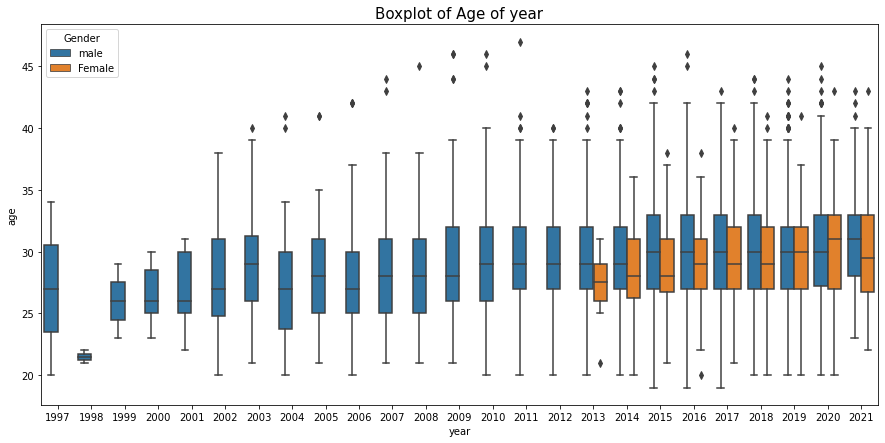

In [62]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='age',hue='Gender',data=newUfc)
plt.title('Boxplot of Age of year',fontsize=15)